**Import libraries and data**

In [1]:
# -*- coding: utf-8 -*-
!pip install pythainlp
!pip install tabulate
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
import string
import seaborn as sns
import numpy as np
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
import matplotlib as mpl
from wordcloud import WordCloud
from nltk.probability import FreqDist
from matplotlib.font_manager import FontProperties
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from tabulate import tabulate
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Import train data from csv
df = pd.read_csv('../../../../OneDrive/Documents/data.csv')

In [3]:
# Check the data shape
print(df.shape)

(6085, 13)


**Model**

In [4]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['newstype'])

In [5]:
def evaluate_model_with_model_name (df_input,model_vector,model_name):
  print("Vectorizer:",model_vector)
  print("Classifier Model:",model_name)
  # Split data into training and testing sets
  X = df_input['title'] + ' ' + df_input['details']+ ' ' + df_input['month'].astype(str)+ ' '+ df_input['season']
  y = df_input['target']

  if model_vector == "CountVectorizer" :
    model_vectorizer = CountVectorizer(lowercase=False)
  elif model_vector == 'TfidfVectorizer' :
    model_vectorizer = TfidfVectorizer(lowercase=False)

  X = model_vectorizer.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)


  if model_name == "LogisticRegression" :
    model = LogisticRegression()
  elif model_name == 'KNeighborsClassifier' :
    model = KNeighborsClassifier()
  elif model_name == 'RandomForestClassifier' :
    model = RandomForestClassifier()
  elif model_name == 'ExtraTreesClassifier' :
    model = ExtraTreesClassifier()
  elif model_name == 'NaiveBayes' :
    model = MultinomialNB()
  else:
    print("Model Not correct. Exiting function.")
    return

  model.fit(X_train, y_train)
  # Use cross-validation to assess model performance
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  y_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  # Calculate accuracy
  accuracy = accuracy_score(y_train, y_train_pred)
  print("Accuracy on Train:", accuracy)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy on Test:", accuracy)
  # Generate a classification report
  y_test = label_encoder.inverse_transform(y_test)
  y_pred = label_encoder.inverse_transform(y_pred)
  report = classification_report(y_test, y_pred)
  print("Classification Report:")
  print(report)

  # Create a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Labels')
  plt.show()

Vectorizer: CountVectorizer
Classifier Model: LogisticRegression


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Cross-Validation Score: 0.7222656489065128
Accuracy on Train: 0.9815119145439606
Accuracy on Test: 0.7329498767460969
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.79      0.79      0.79       302
    ครอบครัว       0.68      0.59      0.63        81
สินค้าสุขภาพ       0.11      0.08      0.09        26
 สิ่งแวดล้อม       0.76      0.50      0.60        52
 อาหารการกิน       0.74      0.68      0.71       160
       อื่นๆ       0.43      0.43      0.43       103
         โรค       0.78      0.86      0.82       493

    accuracy                           0.73      1217
   macro avg       0.61      0.56      0.58      1217
weighted avg       0.73      0.73      0.73      1217



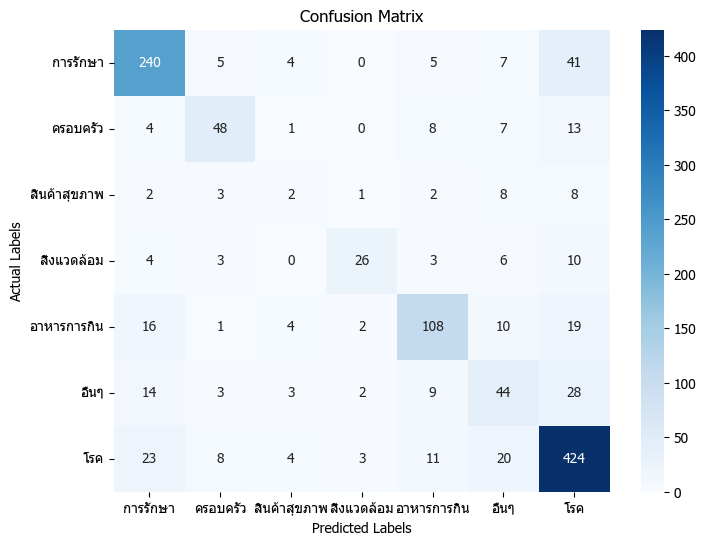

Vectorizer: CountVectorizer
Classifier Model: KNeighborsClassifier
Mean Cross-Validation Score: 0.6265416766029828
Accuracy on Train: 0.7571898110106821
Accuracy on Test: 0.6565324568611339
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.76      0.77      0.76       302
    ครอบครัว       0.49      0.33      0.40        81
สินค้าสุขภาพ       0.60      0.12      0.19        26
 สิ่งแวดล้อม       0.86      0.35      0.49        52
 อาหารการกิน       0.67      0.45      0.54       160
       อื่นๆ       0.29      0.26      0.27       103
         โรค       0.67      0.85      0.75       493

    accuracy                           0.66      1217
   macro avg       0.62      0.45      0.49      1217
weighted avg       0.65      0.66      0.64      1217



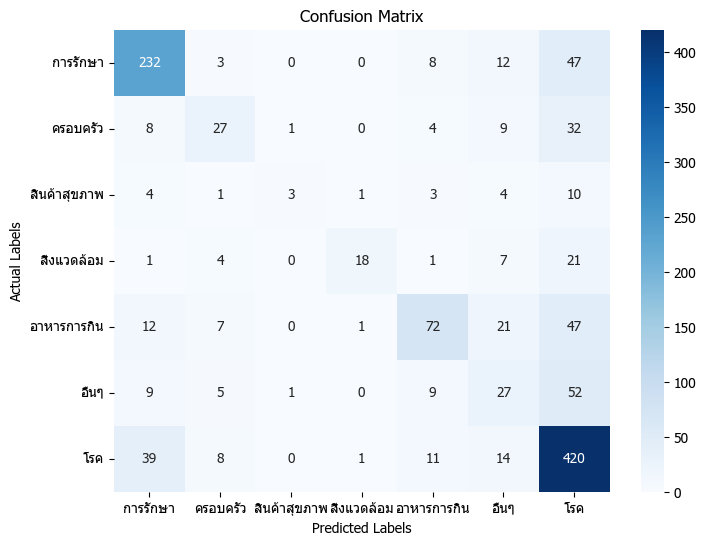

Vectorizer: CountVectorizer
Classifier Model: RandomForestClassifier
Mean Cross-Validation Score: 0.6980301824835232
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.6984387838948234
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.79      0.81      0.80       302
    ครอบครัว       0.63      0.33      0.44        81
สินค้าสุขภาพ       0.00      0.00      0.00        26
 สิ่งแวดล้อม       0.80      0.38      0.52        52
 อาหารการกิน       0.59      0.64      0.61       160
       อื่นๆ       0.37      0.17      0.23       103
         โรค       0.71      0.89      0.79       493

    accuracy                           0.70      1217
   macro avg       0.55      0.46      0.48      1217
weighted avg       0.67      0.70      0.67      1217



C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


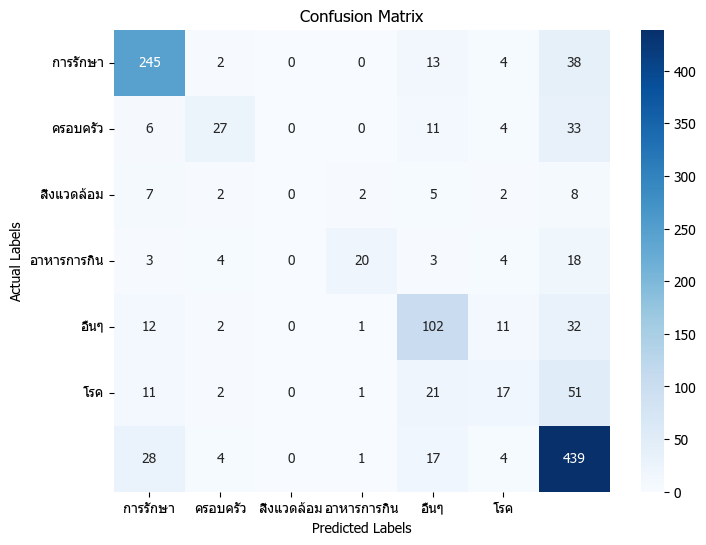

Vectorizer: CountVectorizer
Classifier Model: ExtraTreesClassifier
Mean Cross-Validation Score: 0.701522208457933
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.7124075595727198
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.79      0.81      0.80       302
    ครอบครัว       0.73      0.33      0.46        81
สินค้าสุขภาพ       0.50      0.04      0.07        26
 สิ่งแวดล้อม       0.84      0.40      0.55        52
 อาหารการกิน       0.66      0.68      0.67       160
       อื่นๆ       0.41      0.18      0.26       103
         โรค       0.71      0.90      0.79       493

    accuracy                           0.71      1217
   macro avg       0.66      0.48      0.51      1217
weighted avg       0.70      0.71      0.68      1217



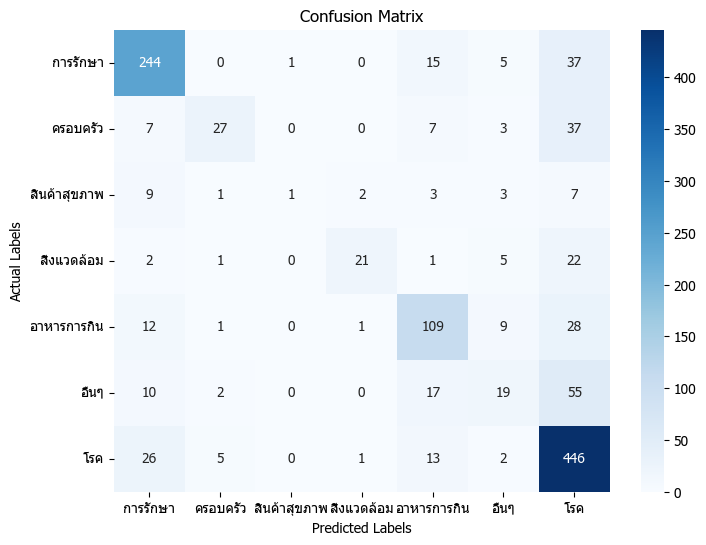

Vectorizer: CountVectorizer
Classifier Model: NaiveBayes
Mean Cross-Validation Score: 0.7234989479815386
Accuracy on Train: 0.8315529991783073
Accuracy on Test: 0.7395234182415776
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.79      0.78      0.79       302
    ครอบครัว       0.69      0.51      0.59        81
สินค้าสุขภาพ       0.25      0.04      0.07        26
 สิ่งแวดล้อม       0.84      0.52      0.64        52
 อาหารการกิน       0.61      0.82      0.70       160
       อื่นๆ       0.49      0.44      0.46       103
         โรค       0.81      0.85      0.83       493

    accuracy                           0.74      1217
   macro avg       0.64      0.56      0.58      1217
weighted avg       0.73      0.74      0.73      1217



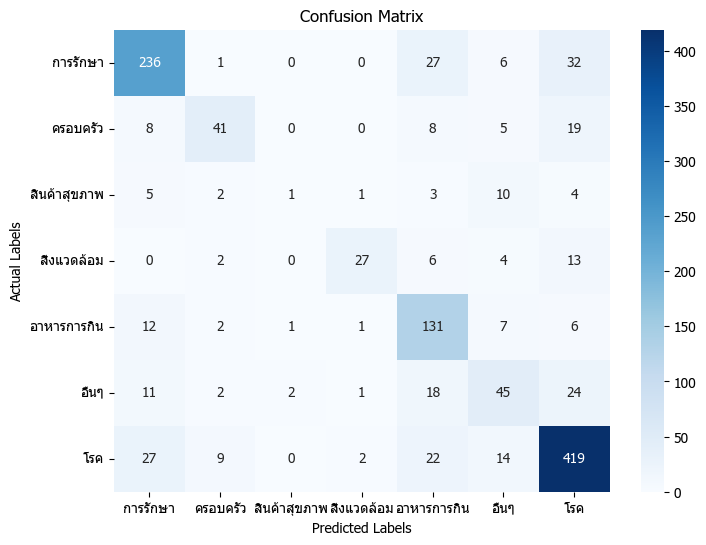

Vectorizer: TfidfVectorizer
Classifier Model: LogisticRegression


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Cross-Validation Score: 0.7232921319148846
Accuracy on Train: 0.8436729663105998
Accuracy on Test: 0.7452752670501233
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.80      0.80      0.80       302
    ครอบครัว       0.78      0.47      0.58        81
สินค้าสุขภาพ       0.33      0.04      0.07        26
 สิ่งแวดล้อม       0.88      0.44      0.59        52
 อาหารการกิน       0.74      0.76      0.75       160
       อื่นๆ       0.45      0.29      0.36       103
         โรค       0.74      0.91      0.82       493

    accuracy                           0.75      1217
   macro avg       0.68      0.53      0.57      1217
weighted avg       0.73      0.75      0.73      1217



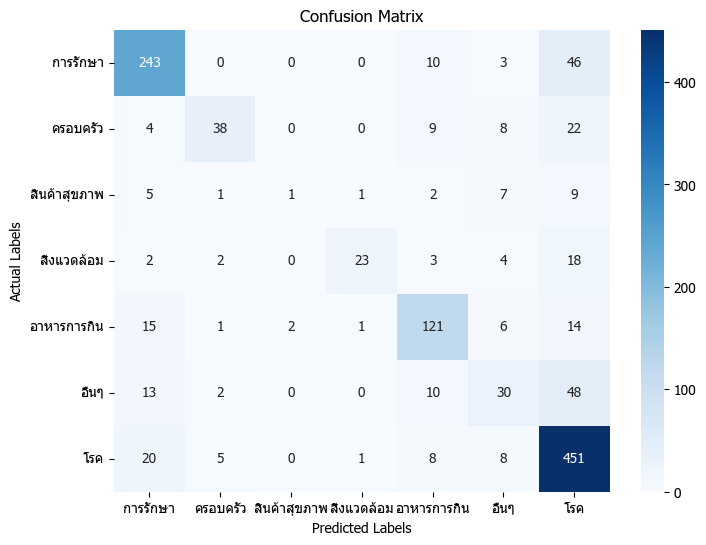

Vectorizer: TfidfVectorizer
Classifier Model: KNeighborsClassifier
Mean Cross-Validation Score: 0.675018940553043
Accuracy on Train: 0.7838948233360723
Accuracy on Test: 0.6910435497124076
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.67      0.78      0.72       302
    ครอบครัว       0.65      0.49      0.56        81
สินค้าสุขภาพ       0.19      0.12      0.14        26
 สิ่งแวดล้อม       0.66      0.60      0.63        52
 อาหารการกิน       0.66      0.67      0.66       160
       อื่นๆ       0.43      0.25      0.32       103
         โรค       0.77      0.81      0.79       493

    accuracy                           0.69      1217
   macro avg       0.57      0.53      0.55      1217
weighted avg       0.68      0.69      0.68      1217



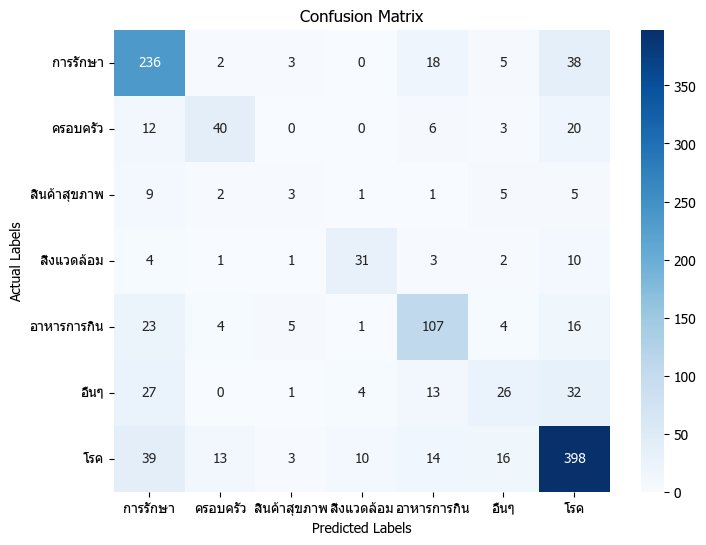

Vectorizer: TfidfVectorizer
Classifier Model: RandomForestClassifier
Mean Cross-Validation Score: 0.6955606298182341
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.7033689400164339
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.76      0.80      0.78       302
    ครอบครัว       0.76      0.36      0.49        81
สินค้าสุขภาพ       1.00      0.04      0.07        26
 สิ่งแวดล้อม       0.87      0.38      0.53        52
 อาหารการกิน       0.58      0.69      0.63       160
       อื่นๆ       0.42      0.11      0.17       103
         โรค       0.71      0.90      0.79       493

    accuracy                           0.70      1217
   macro avg       0.73      0.47      0.50      1217
weighted avg       0.70      0.70      0.67      1217



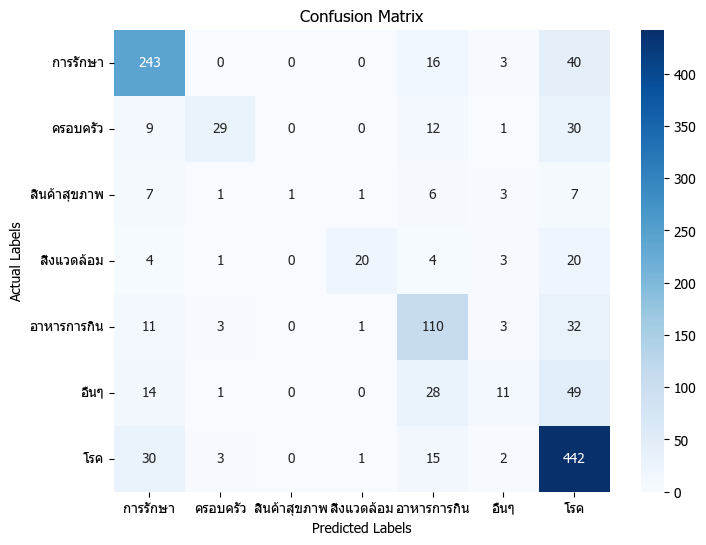

Vectorizer: TfidfVectorizer
Classifier Model: ExtraTreesClassifier
Mean Cross-Validation Score: 0.7062447900289331
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.7132292522596549
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.76      0.79      0.77       302
    ครอบครัว       0.74      0.36      0.48        81
สินค้าสุขภาพ       1.00      0.04      0.07        26
 สิ่งแวดล้อม       0.89      0.46      0.61        52
 อาหารการกิน       0.70      0.68      0.69       160
       อื่นๆ       0.46      0.17      0.25       103
         โรค       0.70      0.91      0.79       493

    accuracy                           0.71      1217
   macro avg       0.75      0.49      0.52      1217
weighted avg       0.71      0.71      0.68      1217



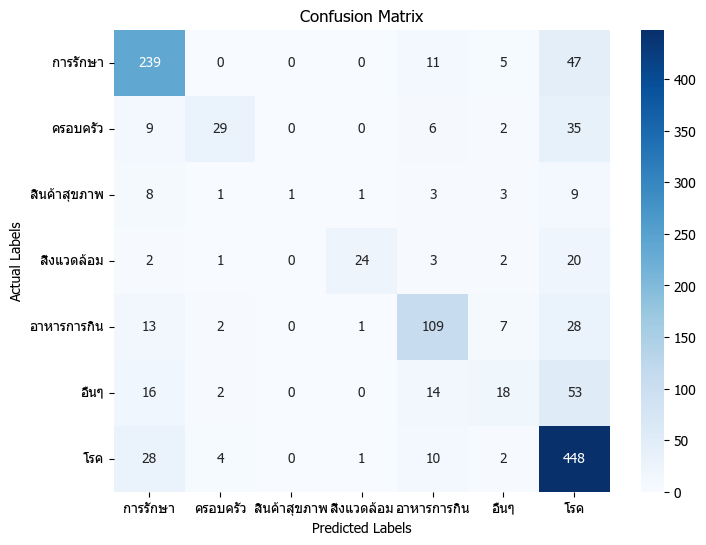

Vectorizer: TfidfVectorizer
Classifier Model: NaiveBayes
Mean Cross-Validation Score: 0.6057914829767164
Accuracy on Train: 0.6828266228430567
Accuracy on Test: 0.6351684470008216
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.77      0.72      0.74       302
    ครอบครัว       1.00      0.05      0.09        81
สินค้าสุขภาพ       0.00      0.00      0.00        26
 สิ่งแวดล้อม       0.00      0.00      0.00        52
 อาหารการกิน       0.81      0.46      0.59       160
       อื่นๆ       1.00      0.01      0.02       103
         โรค       0.57      0.97      0.72       493

    accuracy                           0.64      1217
   macro avg       0.59      0.32      0.31      1217
weighted avg       0.68      0.64      0.56      1217



C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


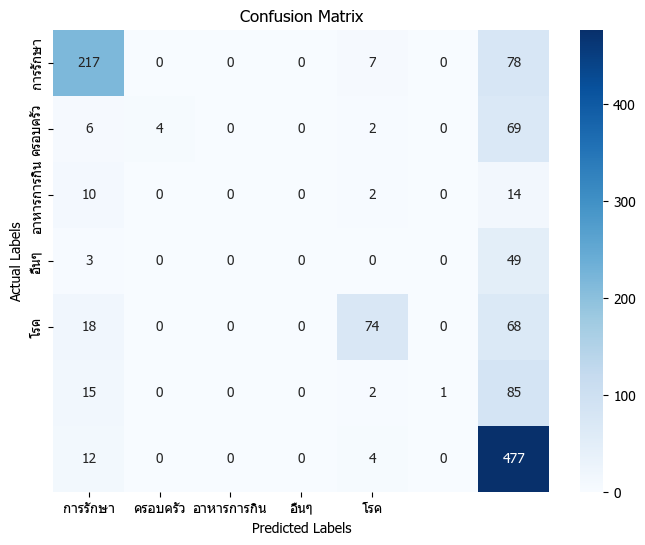

In [6]:
evaluate_model_with_model_name(df,'CountVectorizer','LogisticRegression')
evaluate_model_with_model_name(df,'CountVectorizer','KNeighborsClassifier')
evaluate_model_with_model_name(df,'CountVectorizer','RandomForestClassifier')
evaluate_model_with_model_name(df,'CountVectorizer','ExtraTreesClassifier')
evaluate_model_with_model_name(df,'CountVectorizer','NaiveBayes')
evaluate_model_with_model_name(df,'TfidfVectorizer','LogisticRegression')
evaluate_model_with_model_name(df,'TfidfVectorizer','KNeighborsClassifier')
evaluate_model_with_model_name(df,'TfidfVectorizer','RandomForestClassifier')
evaluate_model_with_model_name(df,'TfidfVectorizer','ExtraTreesClassifier')
evaluate_model_with_model_name(df,'TfidfVectorizer','NaiveBayes')

In [7]:
def evaluate_model_with_model_name_smote (df_input,model_vector,model_name):
  print("Vectorizer:",model_vector)
  print("Classifier Model:",model_name)

  X = df_input['title'] + ' ' + df_input['details']+ ' ' + df_input['month'].astype(str)+ ' '+ df_input['season']
  y = df_input['target']

  if model_vector == "CountVectorizer" :
    model_vectorizer = CountVectorizer(ngram_range=(1, 1),lowercase=False)
  elif model_vector == 'TfidfVectorizer' :
    model_vectorizer = TfidfVectorizer(ngram_range=(1, 1),lowercase=False)

  X = model_vectorizer.fit_transform(X)

  # Split data into training and testing sets

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)



  smote = SMOTE(random_state=42)
  X_train, y_train = smote.fit_resample(X_train, y_train)


  if model_name == "LogisticRegression" :
    model = LogisticRegression()
  elif model_name == 'KNeighborsClassifier' :
    model = KNeighborsClassifier()
  elif model_name == 'RandomForestClassifier' :
    model = RandomForestClassifier()
  elif model_name == 'ExtraTreesClassifier' :
    model = ExtraTreesClassifier()
  elif model_name == 'NaiveBayes' :
    model = MultinomialNB()
  else:
    print("Model Not correct. Exiting function.")
    return

  model.fit(X_train, y_train)
  # Use cross-validation to assess model performance
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  y_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  # Calculate accuracy
  accuracy = accuracy_score(y_train, y_train_pred)
  print("Accuracy on Train:", accuracy)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy on Test:", accuracy)
  # Generate a classification report
  y_test = label_encoder.inverse_transform(y_test)
  y_pred = label_encoder.inverse_transform(y_pred)
  report = classification_report(y_test, y_pred)
  print("Classification Report:")
  print(report)

  # Create a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('Autual Labels')
  plt.show()

Vectorizer: CountVectorizer
Classifier Model: LogisticRegression


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Cross-Validation Score: 0.8571490495984619
Accuracy on Train: 0.9543117804648469
Accuracy on Test: 0.6902218570254725
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.81      0.77      0.79       302
    ครอบครัว       0.57      0.57      0.57        81
สินค้าสุขภาพ       0.18      0.27      0.22        26
 สิ่งแวดล้อม       0.52      0.60      0.55        52
 อาหารการกิน       0.70      0.69      0.69       160
       อื่นๆ       0.34      0.38      0.36       103
         โรค       0.79      0.76      0.77       493

    accuracy                           0.69      1217
   macro avg       0.56      0.58      0.56      1217
weighted avg       0.70      0.69      0.70      1217



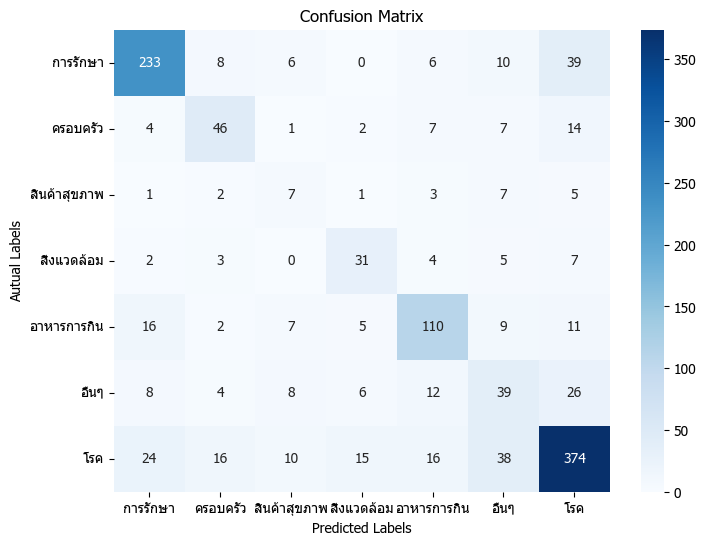

Vectorizer: CountVectorizer
Classifier Model: KNeighborsClassifier
Mean Cross-Validation Score: 0.7434652539781005
Accuracy on Train: 0.8207226124103975
Accuracy on Test: 0.4371405094494659
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.76      0.76      0.76       302
    ครอบครัว       0.23      0.75      0.36        81
สินค้าสุขภาพ       0.10      0.35      0.16        26
 สิ่งแวดล้อม       0.18      0.63      0.28        52
 อาหารการกิน       0.55      0.54      0.54       160
       อื่นๆ       0.27      0.38      0.31       103
         โรค       0.93      0.15      0.26       493

    accuracy                           0.44      1217
   macro avg       0.43      0.51      0.38      1217
weighted avg       0.68      0.44      0.43      1217



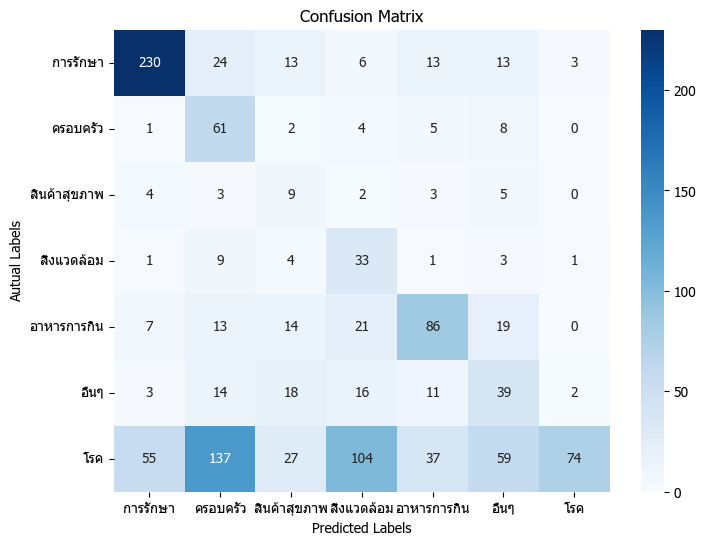

Vectorizer: CountVectorizer
Classifier Model: RandomForestClassifier
Mean Cross-Validation Score: 0.8659074618753084
Accuracy on Train: 0.9877633770183187
Accuracy on Test: 0.6828266228430567
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.76      0.81      0.79       302
    ครอบครัว       0.50      0.67      0.57        81
สินค้าสุขภาพ       0.22      0.23      0.23        26
 สิ่งแวดล้อม       0.44      0.60      0.51        52
 อาหารการกิน       0.65      0.66      0.65       160
       อื่นๆ       0.37      0.38      0.37       103
         โรค       0.83      0.71      0.77       493

    accuracy                           0.68      1217
   macro avg       0.54      0.58      0.55      1217
weighted avg       0.70      0.68      0.69      1217



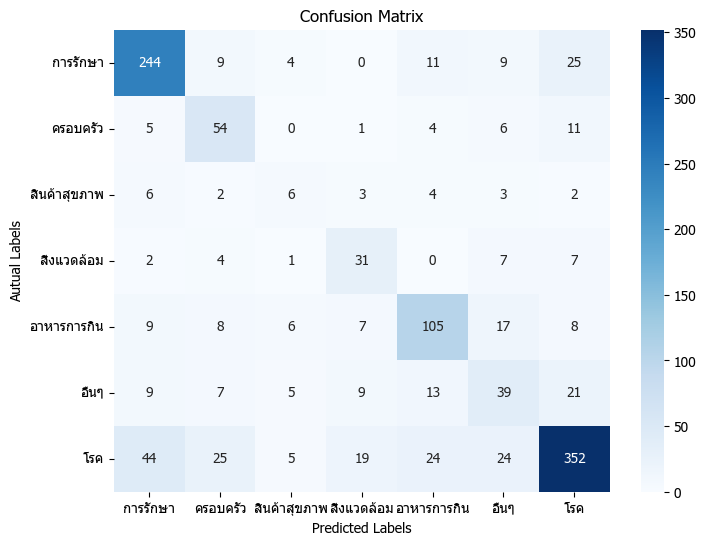

Vectorizer: CountVectorizer
Classifier Model: ExtraTreesClassifier
Mean Cross-Validation Score: 0.8790133561233671
Accuracy on Train: 0.9877633770183187
Accuracy on Test: 0.6943303204601479
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.77      0.82      0.80       302
    ครอบครัว       0.51      0.60      0.55        81
สินค้าสุขภาพ       0.35      0.23      0.28        26
 สิ่งแวดล้อม       0.45      0.60      0.51        52
 อาหารการกิน       0.64      0.66      0.65       160
       อื่นๆ       0.34      0.34      0.34       103
         โรค       0.83      0.75      0.79       493

    accuracy                           0.69      1217
   macro avg       0.56      0.57      0.56      1217
weighted avg       0.70      0.69      0.70      1217



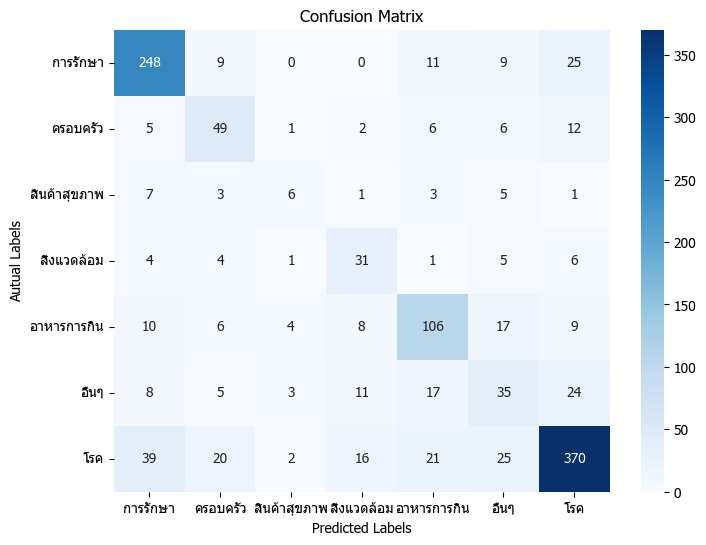

Vectorizer: CountVectorizer
Classifier Model: NaiveBayes
Mean Cross-Validation Score: 0.7860416547094992
Accuracy on Train: 0.8234740424299472
Accuracy on Test: 0.7206244864420707
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.83      0.76      0.79       302
    ครอบครัว       0.63      0.69      0.66        81
สินค้าสุขภาพ       0.18      0.31      0.23        26
 สิ่งแวดล้อม       0.60      0.63      0.62        52
 อาหารการกิน       0.64      0.77      0.70       160
       อื่นๆ       0.44      0.53      0.48       103
         โรค       0.86      0.76      0.80       493

    accuracy                           0.72      1217
   macro avg       0.60      0.64      0.61      1217
weighted avg       0.75      0.72      0.73      1217



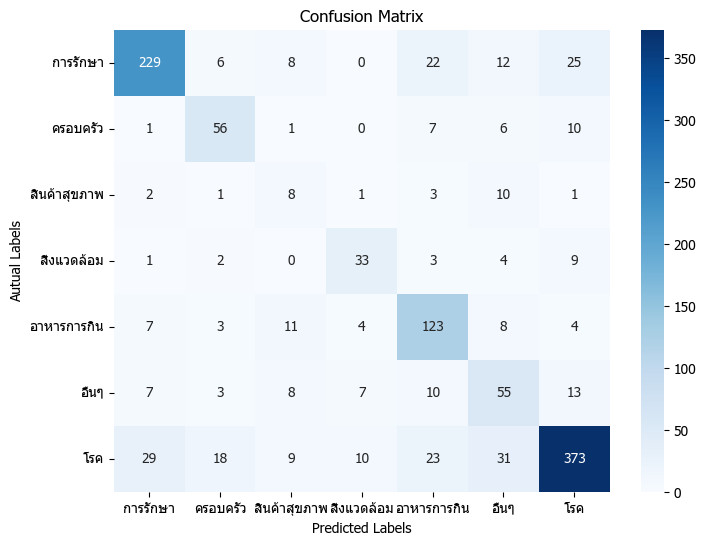

Vectorizer: TfidfVectorizer
Classifier Model: LogisticRegression


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Cross-Validation Score: 0.9187629645179408
Accuracy on Train: 0.9521395988704656
Accuracy on Test: 0.7165160230073953
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.83      0.75      0.79       302
    ครอบครัว       0.63      0.70      0.67        81
สินค้าสุขภาพ       0.13      0.23      0.16        26
 สิ่งแวดล้อม       0.68      0.62      0.65        52
 อาหารการกิน       0.66      0.76      0.71       160
       อื่นๆ       0.38      0.51      0.43       103
         โรค       0.86      0.76      0.81       493

    accuracy                           0.72      1217
   macro avg       0.60      0.62      0.60      1217
weighted avg       0.75      0.72      0.73      1217



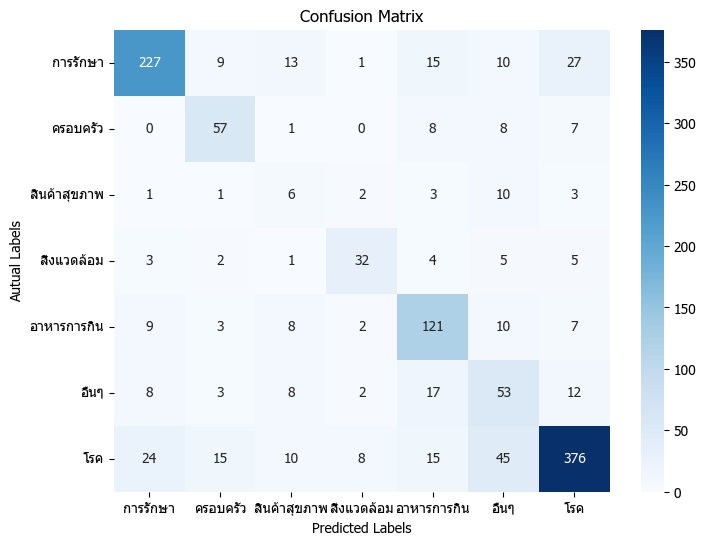

Vectorizer: TfidfVectorizer
Classifier Model: KNeighborsClassifier
Mean Cross-Validation Score: 0.8569270983616912
Accuracy on Train: 0.8925494171312722
Accuracy on Test: 0.5119145439605588
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.74      0.71      0.72       302
    ครอบครัว       0.36      0.68      0.47        81
สินค้าสุขภาพ       0.14      0.54      0.22        26
 สิ่งแวดล้อม       0.30      0.73      0.42        52
 อาหารการกิน       0.57      0.70      0.63       160
       อื่นๆ       0.24      0.46      0.32       103
         โรค       0.91      0.29      0.44       493

    accuracy                           0.51      1217
   macro avg       0.47      0.59      0.46      1217
weighted avg       0.69      0.51      0.52      1217



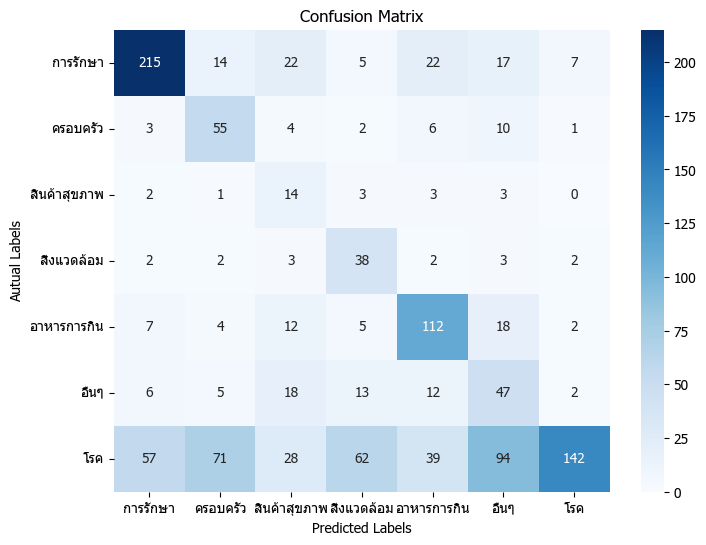

Vectorizer: TfidfVectorizer
Classifier Model: RandomForestClassifier
Mean Cross-Validation Score: 0.942658403969072
Accuracy on Train: 0.9996379697342698
Accuracy on Test: 0.7198027937551356
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.77      0.82      0.79       302
    ครอบครัว       0.61      0.53      0.57        81
สินค้าสุขภาพ       0.33      0.04      0.07        26
 สิ่งแวดล้อม       0.85      0.56      0.67        52
 อาหารการกิน       0.58      0.68      0.63       160
       อื่นๆ       0.49      0.38      0.43       103
         โรค       0.78      0.83      0.80       493

    accuracy                           0.72      1217
   macro avg       0.63      0.55      0.57      1217
weighted avg       0.71      0.72      0.71      1217



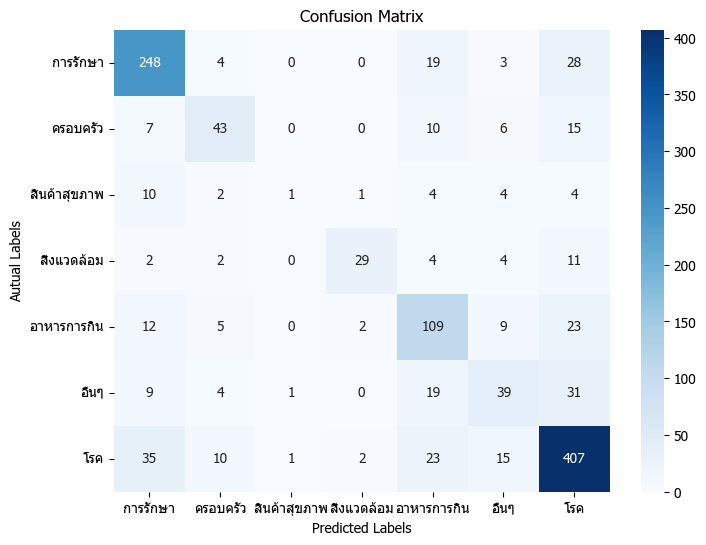

Vectorizer: TfidfVectorizer
Classifier Model: ExtraTreesClassifier
Mean Cross-Validation Score: 0.9575717240047247
Accuracy on Train: 0.9996379697342698
Accuracy on Test: 0.7477403451109285
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.80      0.80      0.80       302
    ครอบครัว       0.70      0.60      0.65        81
สินค้าสุขภาพ       0.43      0.12      0.18        26
 สิ่งแวดล้อม       0.79      0.58      0.67        52
 อาหารการกิน       0.64      0.76      0.70       160
       อื่นๆ       0.51      0.35      0.42       103
         โรค       0.79      0.87      0.83       493

    accuracy                           0.75      1217
   macro avg       0.67      0.58      0.61      1217
weighted avg       0.74      0.75      0.74      1217



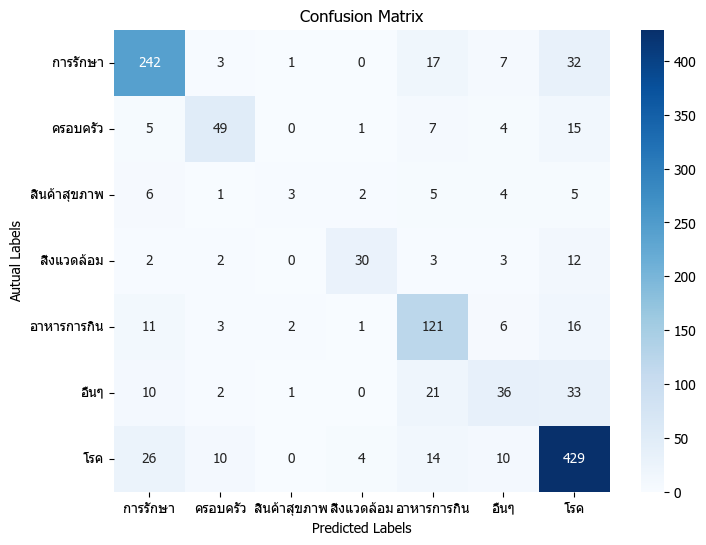

Vectorizer: TfidfVectorizer
Classifier Model: NaiveBayes
Mean Cross-Validation Score: 0.8771292996336456
Accuracy on Train: 0.9047136340598074
Accuracy on Test: 0.6828266228430567
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.82      0.70      0.75       302
    ครอบครัว       0.56      0.79      0.65        81
สินค้าสุขภาพ       0.19      0.58      0.28        26
 สิ่งแวดล้อม       0.47      0.69      0.56        52
 อาหารการกิน       0.64      0.75      0.69       160
       อื่นๆ       0.43      0.47      0.45       103
         โรค       0.86      0.69      0.76       493

    accuracy                           0.68      1217
   macro avg       0.57      0.67      0.59      1217
weighted avg       0.74      0.68      0.70      1217



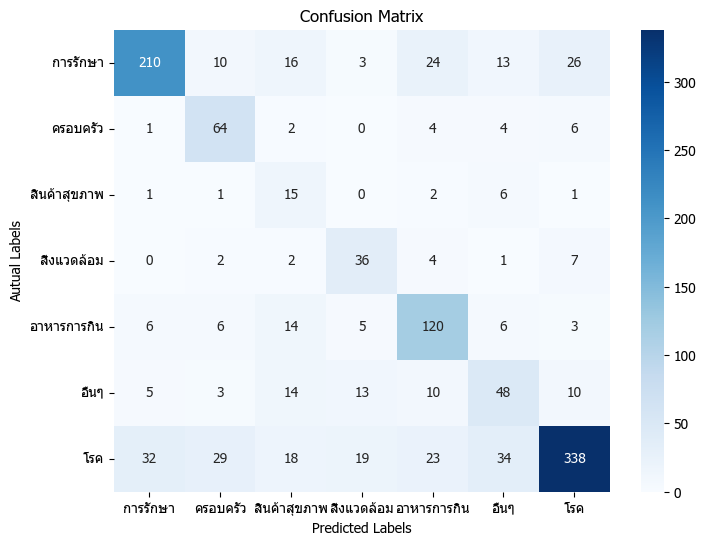

In [8]:
evaluate_model_with_model_name_smote(df,'CountVectorizer','LogisticRegression')
evaluate_model_with_model_name_smote(df,'CountVectorizer','KNeighborsClassifier')
evaluate_model_with_model_name_smote(df,'CountVectorizer','RandomForestClassifier')
evaluate_model_with_model_name_smote(df,'CountVectorizer','ExtraTreesClassifier')
evaluate_model_with_model_name_smote(df,'CountVectorizer','NaiveBayes')
evaluate_model_with_model_name_smote(df,'TfidfVectorizer','LogisticRegression')
evaluate_model_with_model_name_smote(df,'TfidfVectorizer','KNeighborsClassifier')
evaluate_model_with_model_name_smote(df,'TfidfVectorizer','RandomForestClassifier')
evaluate_model_with_model_name_smote(df,'TfidfVectorizer','ExtraTreesClassifier')
evaluate_model_with_model_name_smote(df,'TfidfVectorizer','NaiveBayes')

In [9]:
def evaluate_model_with_model_name_class_weight (df_input,model_vector,model_name):
  print("Vectorizer:",model_vector)
  print("Classifier Model:",model_name)

  X = df_input['title'] + ' ' + df_input['details']+ ' ' + df_input['month'].astype(str)+ ' '+ df_input['season']
  y = df_input['target']


  if model_vector == "CountVectorizer" :
    model_vectorizer = CountVectorizer(ngram_range=(1, 2),lowercase=False)
  elif model_vector == 'TfidfVectorizer' :
    model_vectorizer = TfidfVectorizer(ngram_range=(1, 2),lowercase=False)

  X = model_vectorizer.fit_transform(X)
  # Split data into training and testing sets


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)

  if model_name == "LogisticRegression" :
    model = LogisticRegression(class_weight='balanced')
  elif model_name == 'RandomForestClassifier' :
    model = RandomForestClassifier(class_weight='balanced')
  elif model_name == 'ExtraTreesClassifier' :
    model = ExtraTreesClassifier(class_weight='balanced')
  else:
    print("Model Not correct. Exiting function.")
    return

  model.fit(X_train, y_train)
  # Use cross-validation to assess model performance
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  y_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  # Calculate accuracy
  accuracy = accuracy_score(y_train, y_train_pred)
  print("Accuracy on Train:", accuracy)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy on Test:", accuracy)
  # Generate a classification report
  y_test = label_encoder.inverse_transform(y_test)
  y_pred = label_encoder.inverse_transform(y_pred)
  report = classification_report(y_test, y_pred)
  print("Classification Report:")
  print(report)

  # Create a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

Vectorizer: CountVectorizer
Classifier Model: LogisticRegression


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Cross-Validation Score: 0.7450700747703392
Accuracy on Train: 0.9985620377978636
Accuracy on Test: 0.751848808545604
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.82      0.81      0.81       302
    ครอบครัว       0.65      0.67      0.66        81
สินค้าสุขภาพ       0.18      0.15      0.17        26
 สิ่งแวดล้อม       0.71      0.58      0.64        52
 อาหารการกิน       0.73      0.74      0.73       160
       อื่นๆ       0.45      0.50      0.47       103
         โรค       0.83      0.84      0.84       493

    accuracy                           0.75      1217
   macro avg       0.63      0.61      0.62      1217
weighted avg       0.75      0.75      0.75      1217



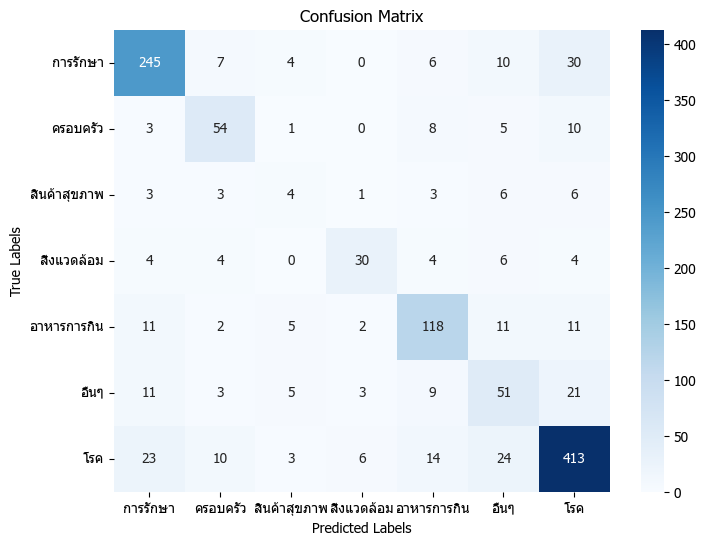

Vectorizer: CountVectorizer
Classifier Model: RandomForestClassifier
Mean Cross-Validation Score: 0.6787205260725419
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.6943303204601479
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.80      0.80      0.80       302
    ครอบครัว       0.76      0.35      0.47        81
สินค้าสุขภาพ       0.00      0.00      0.00        26
 สิ่งแวดล้อม       0.83      0.37      0.51        52
 อาหารการกิน       0.63      0.67      0.65       160
       อื่นๆ       0.37      0.07      0.11       103
         โรค       0.66      0.90      0.76       493

    accuracy                           0.69      1217
   macro avg       0.58      0.45      0.47      1217
weighted avg       0.67      0.69      0.66      1217



C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


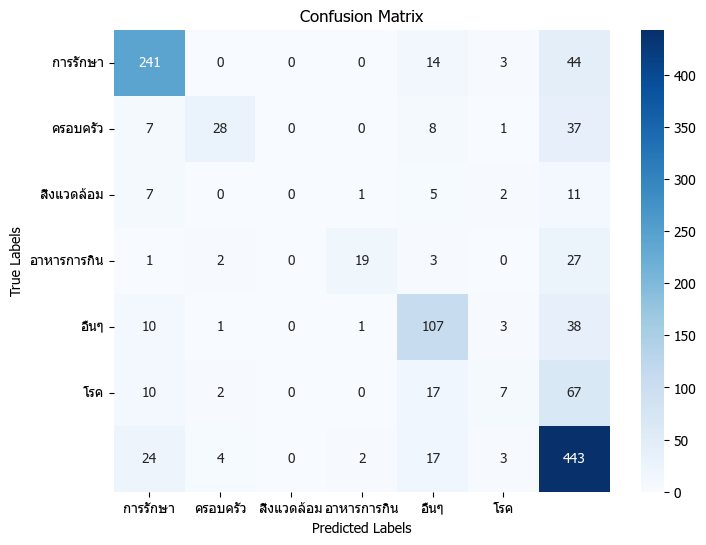

Vectorizer: CountVectorizer
Classifier Model: ExtraTreesClassifier
Mean Cross-Validation Score: 0.6844704347991246
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.6885784716516024
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.78      0.77      0.78       302
    ครอบครัว       0.81      0.37      0.51        81
สินค้าสุขภาพ       1.00      0.04      0.07        26
 สิ่งแวดล้อม       0.88      0.42      0.57        52
 อาหารการกิน       0.63      0.65      0.64       160
       อื่นๆ       0.53      0.08      0.14       103
         โรค       0.65      0.89      0.75       493

    accuracy                           0.69      1217
   macro avg       0.75      0.46      0.49      1217
weighted avg       0.70      0.69      0.65      1217



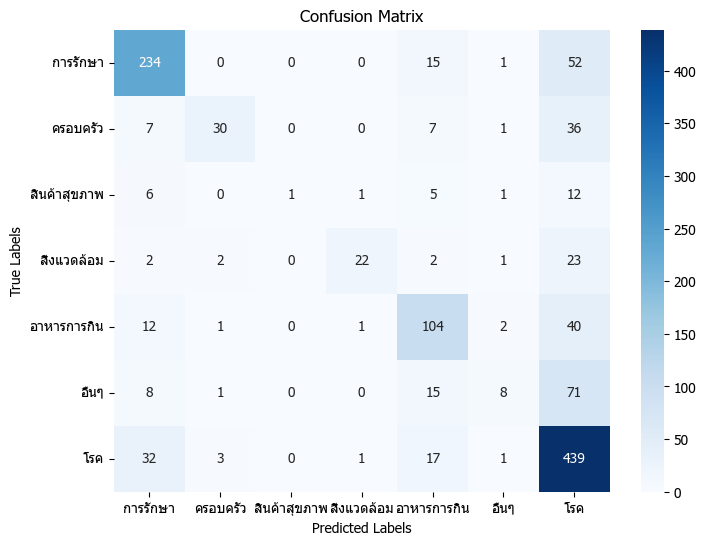

Vectorizer: TfidfVectorizer
Classifier Model: LogisticRegression
Mean Cross-Validation Score: 0.7278163388913393
Accuracy on Train: 0.8913311421528348
Accuracy on Test: 0.7165160230073953
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.84      0.75      0.79       302
    ครอบครัว       0.65      0.69      0.67        81
สินค้าสุขภาพ       0.19      0.19      0.19        26
 สิ่งแวดล้อม       0.68      0.58      0.62        52
 อาหารการกิน       0.61      0.77      0.68       160
       อื่นๆ       0.37      0.57      0.45       103
         โรค       0.86      0.75      0.80       493

    accuracy                           0.72      1217
   macro avg       0.60      0.62      0.60      1217
weighted avg       0.75      0.72      0.73      1217



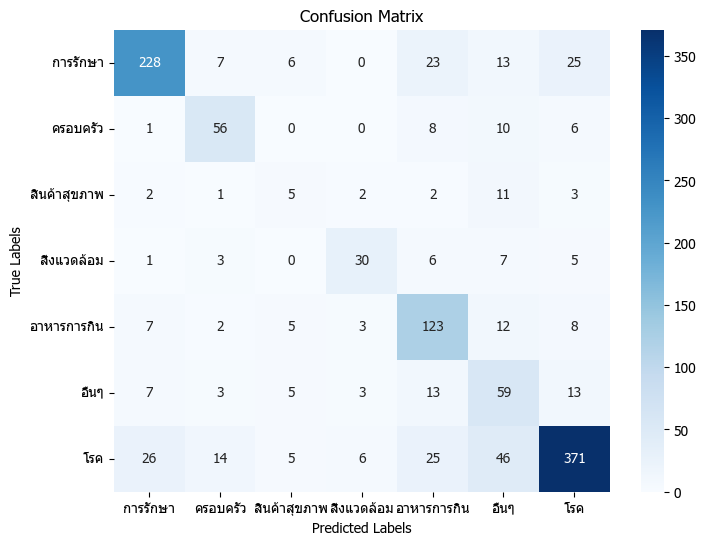

Vectorizer: TfidfVectorizer
Classifier Model: RandomForestClassifier
Mean Cross-Validation Score: 0.6776906664753266
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.6894001643385373
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.78      0.78      0.78       302
    ครอบครัว       0.77      0.30      0.43        81
สินค้าสุขภาพ       1.00      0.04      0.07        26
 สิ่งแวดล้อม       0.80      0.31      0.44        52
 อาหารการกิน       0.58      0.72      0.64       160
       อื่นๆ       0.40      0.06      0.10       103
         โรค       0.68      0.89      0.77       493

    accuracy                           0.69      1217
   macro avg       0.72      0.44      0.46      1217
weighted avg       0.69      0.69      0.65      1217



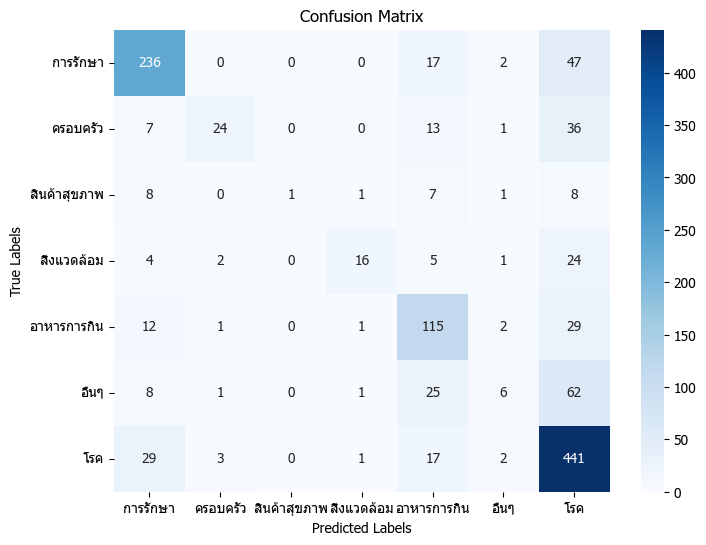

Vectorizer: TfidfVectorizer
Classifier Model: ExtraTreesClassifier
Mean Cross-Validation Score: 0.6933019029188501
Accuracy on Train: 0.9989728841413311
Accuracy on Test: 0.7058340180772391
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.78      0.77      0.78       302
    ครอบครัว       0.80      0.40      0.53        81
สินค้าสุขภาพ       1.00      0.04      0.07        26
 สิ่งแวดล้อม       0.82      0.35      0.49        52
 อาหารการกิน       0.65      0.71      0.68       160
       อื่นๆ       0.50      0.10      0.16       103
         โรค       0.68      0.91      0.78       493

    accuracy                           0.71      1217
   macro avg       0.75      0.47      0.50      1217
weighted avg       0.71      0.71      0.67      1217



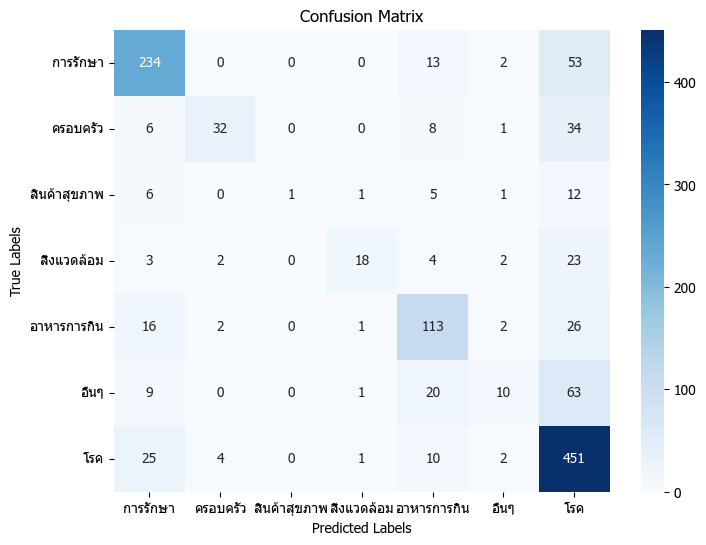

In [10]:
evaluate_model_with_model_name_class_weight(df,'CountVectorizer','LogisticRegression')
evaluate_model_with_model_name_class_weight(df,'CountVectorizer','RandomForestClassifier')
evaluate_model_with_model_name_class_weight(df,'CountVectorizer','ExtraTreesClassifier')
evaluate_model_with_model_name_class_weight(df,'TfidfVectorizer','LogisticRegression')
evaluate_model_with_model_name_class_weight(df,'TfidfVectorizer','RandomForestClassifier')
evaluate_model_with_model_name_class_weight(df,'TfidfVectorizer','ExtraTreesClassifier')

In [11]:
def CountVectorizer_LogisticRegression_fine (df_input):

  X = df_input['title'] + ' ' + df_input['details']+ ' ' + df_input['month'].astype(str)+ ' '+ df_input['season']
  y = df_input['target']

  model_vectorizer = CountVectorizer(ngram_range=(1, 2),lowercase=False)

  X = model_vectorizer.fit_transform(X)
  # Assuming X and y are your data and labels
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Define the Logistic Regression model
  logreg = LogisticRegression(class_weight='balanced',solver='liblinear')

  # Define the hyperparameters and their possible values for tuning
  param_grid = {
      'C': [0.1,10,100],
      'max_iter': [1,10,100,1000]
  }

  # Use GridSearchCV to find the best hyperparameters
  grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # Print the best hyperparameters
  print("Best Hyperparameters:", grid_search.best_params_)

  # Get the best model
  best_logreg = grid_search.best_estimator_

  # Make predictions on the test set
  y_pred = best_logreg.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy on the test set: {accuracy:.4f}")

CountVectorizer_LogisticRegression_fine(df)

Best Hyperparameters: {'C': 0.1, 'max_iter': 10}
Accuracy on the test set: 0.7436


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on Train: 0.9420706655710764
Accuracy on Test: 0.7534921939194741
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.81      0.82      0.82       302
    ครอบครัว       0.68      0.67      0.67        81
สินค้าสุขภาพ       0.20      0.15      0.17        26
 สิ่งแวดล้อม       0.79      0.58      0.67        52
 อาหารการกิน       0.71      0.75      0.73       160
       อื่นๆ       0.43      0.49      0.46       103
         โรค       0.84      0.83      0.84       493

    accuracy                           0.75      1217
   macro avg       0.64      0.61      0.62      1217
weighted avg       0.75      0.75      0.75      1217



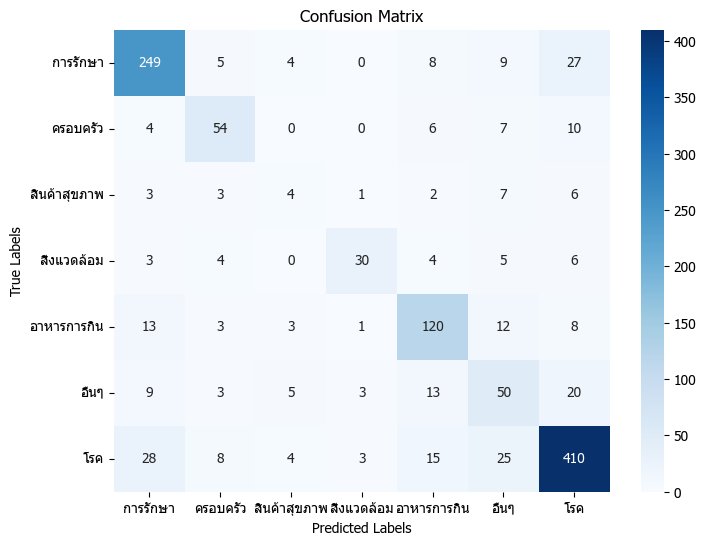

In [12]:
def CountVectorizer_LogisticRegression (df_input):


  X = df_input['title'] + ' ' + df_input['details']+ ' ' + df_input['month'].astype(str)+ ' '+ df_input['season']
  y = df_input['target']

  model_vectorizer = CountVectorizer(ngram_range=(1, 2),lowercase=False)

  X = model_vectorizer.fit_transform(X)
  # Split data into training and testing sets

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)


  model = LogisticRegression(class_weight='balanced',C=0.1,max_iter=100,solver='liblinear') #F1 0.62

  model.fit(X_train, y_train)
  # Use cross-validation to assess model performance
  # cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  # print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  y_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  # Calculate accuracy
  accuracy = accuracy_score(y_train, y_train_pred)
  print("Accuracy on Train:", accuracy)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy on Test:", accuracy)
  # Generate a classification report
  y_test = label_encoder.inverse_transform(y_test)
  y_pred = label_encoder.inverse_transform(y_pred)
  report = classification_report(y_test, y_pred)
  print("Classification Report:")
  print(report)

  # Create a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()


CountVectorizer_LogisticRegression(df)

In [13]:
def CountVectorizer_LogisticRegression_error_check (df):
  df_new = df

  X = df_new['title'] + ' ' + df_new['details']+ ' ' + df_new['month'].astype(str)+ ' '+ df_new['season']
  y = df_new['target']

  model_vectorizer = CountVectorizer(ngram_range=(1, 2),lowercase=False)

  X = model_vectorizer.fit_transform(X)
  # Split data into training and testing sets

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)


  model = LogisticRegression(class_weight='balanced',C=0.1,max_iter=100,solver='liblinear') #F1 0.62

  model.fit(X_train, y_train)
  # Use cross-validation to assess model performance
  # cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  # print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  # Add predicted labels to the DataFrame
  df_new['predicted_target'] = model.predict(X)
  df_new['predicted_target'] = label_encoder.inverse_transform(df_new['predicted_target'])
  #df_new['target'] = label_encoder.inverse_transform(df_new['target'] )

  # Filter misclassified instances
  misclassified_df = df_new[df_new['newstype'] != df_new['predicted_target']]

  # Print misclassified titles for each news type
  for news_type in df_new['newstype'].unique():
    misclassified_titles = misclassified_df[misclassified_df['newstype'] == news_type]['oranginal_title'].tolist()
    correct_class = news_type
    predicted_class = misclassified_df[misclassified_df['newstype'] == news_type]['predicted_target'].tolist()
    print(f"News Type: {news_type}")
    print("Misclassified Titles:")
    for i, title in enumerate(misclassified_titles):
        print(f"  - Title: {title}, Correct Class: {correct_class}, Predicted Class: {predicted_class[i]}")
    print("\n")


CountVectorizer_LogisticRegression_error_check(df)

News Type: อื่นๆ
Misclassified Titles:
  - Title: “เสียวฟัน” อย่ามองข้าม ควรป้องกันและรักษาอย่างถูกวิธี, Correct Class: อื่นๆ, Predicted Class: การรักษา
  - Title: แม่น้อยใจหมอให้ยาผิด ลูกชายกินทีเดียว 14 เม็ด เกือบตาย ยังถูกดุซ้ำอีก, Correct Class: อื่นๆ, Predicted Class: การรักษา
  - Title: "อ้วนแต่ฟิต-ผอมแต่อ้วน" น้ำหนักอาจทำให้คุณเข้าใจร่างกายตัวเองผิด, Correct Class: อื่นๆ, Predicted Class: อาหารการกิน
  - Title: ไขข้อข้องใจเรื่อง กลิ่นตัว โดยแพทย์ผิวหนัง เกิดจากอะไร ป้องกันอย่างไร?, Correct Class: อื่นๆ, Predicted Class: อาหารการกิน
  - Title: ล้างหน้าด้วยน้ํามัน ช่วยให้ผิวกระจ่างใส สิวหัวดําน้อยลง, Correct Class: อื่นๆ, Predicted Class: อาหารการกิน
  - Title: โวยสนั่น! หลัง ศบค.เปิดร้านอาหารได้ แต่ต้องสั่งแบบเดลิเวอรี่เท่านั้น, Correct Class: อื่นๆ, Predicted Class: โรค
  - Title: เสาฆ่าเชื้อด้วยแสง UVC สามารถทำลายผนังเซลล์ไวรัสโควิด-19 ได้ 100% ภายใน 20 นาที, Correct Class: อื่นๆ, Predicted Class: โรค
  - Title: อุทาหรณ์เฉียดตาย! ฝาขวดติดคอลูกวัย 10 เดือน, Correct Class: อื่นๆ,

In [14]:
def CountVectorizer_LogisticRegression_Probability (df):
  df_new = df

  X = df_new['title'] + ' ' + df_new['details']+ ' ' + df_new['month'].astype(str)+ ' '+ df_new['season']
  y = df_new['target']

  model_vectorizer = CountVectorizer(ngram_range=(1, 2),lowercase=False)

  X = model_vectorizer.fit_transform(X)
  # Split data into training and testing sets

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)


  model = LogisticRegression(class_weight='balanced',C=0.1,max_iter=100,solver='liblinear') #F1 0.62

  model.fit(X_train, y_train)
  # Use cross-validation to assess model performance
  # cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  # print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  # Add predicted labels to the DataFrame
  all_pred_proba = model.predict_proba(X)


  # Add predicted probabilities to the DataFrame
  for i, target_class in enumerate(model.classes_):
    target_class = label_encoder.inverse_transform([target_class])[0]
    df_new[f'predicted_{target_class}'] = all_pred_proba[:, i]


CountVectorizer_LogisticRegression_Probability(df)

In [15]:
# Define a formatting function
def format_to_0_00(x):
    if isinstance(x, (int, float)):
        return '{:.2f}'.format(x)
    else:
        return x

df_table = df[['oranginal_title', 'predicted_การรักษา', 'predicted_ครอบครัว', 'predicted_สินค้าสุขภาพ', 'predicted_สิ่งแวดล้อม', 'predicted_อาหารการกิน', 'predicted_อื่นๆ', 'predicted_โรค']].iloc[:100]
df_table = df_table.applymap(format_to_0_00)
# Add columns to the table
print(tabulate(df_table, headers='keys', tablefmt='pretty'))

+----+-----------------------------------------------------------------------------------------+-------------------+-------------------+---------------------+--------------------+----------------------+---------------+---------------+
|    |                                     oranginal_title                                     | predicted_การรักษา | predicted_ครอบครัว | predicted_สินค้าสุขภาพ | predicted_สิ่งแวดล้อม | predicted_อาหารการกิน | predicted_อื่นๆ | predicted_โรค |
+----+-----------------------------------------------------------------------------------------+-------------------+-------------------+---------------------+--------------------+----------------------+---------------+---------------+
| 0  |                      อากาศร้อนจัดในอินเดียคร่าชีวิตผู้คนไปแล้วอย่างน้อย 25 ราย                      |       0.03        |       0.03        |        0.02         |        0.33        |         0.08         |     0.41      |     0.10      |
| 1  |                          โควิด

C:\Users\Chonn\AppData\Local\Temp\ipykernel_27972\3415913903.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_table = df_table.applymap(format_to_0_00)


In [18]:
def get_season(month):
    if month in [11,12,1]:
        return 'winter'
    elif month in [2,3,4,5]:
        return 'summer'
    elif month in [6,7,8,9,10]:
        return 'rainny'
    else:
        return 'unknown'

In [19]:
df_test = pd.read_json('../../../../OneDrive/Documents/test_data.json')
df_test.rename(columns={'category': 'newstype'}, inplace=True)
df_test.rename(columns={'content': 'details'}, inplace=True)
# Split the 'publish_date' column into 'Day', 'Month', and 'Year' columns
df_test['date'] = df_test['date'].astype(str)
df_test[['year', 'month', 'day']] = df_test['date'].str.split('-', expand=True)
df_test['day'] = pd.to_numeric(df_test['day'])
df_test['month'] = pd.to_numeric(df_test['month'])
df_test['year'] = pd.to_numeric(df_test['year'])
df_test['publish_date'] = pd.to_datetime(df_test[['year', 'month', 'day']], errors='coerce')
columns_to_drop = ['url','date']
df_test['season'] = df_test['month'].apply(get_season)
# Drop the specified columns
df_test = df_test.drop(columns=columns_to_drop)
df_test['oranginal_title'] = df_test['title'].copy()

df_test

,title,details,newstype,year,month,day,publish_date,season,oranginal_title
0,“หนุ่มชัยภูมิ” สวนกระแส ก๊งเหล้าผ่าอากาศหนาว เ...,การดื่มเครื่องดื่มแอลกอฮอล์เพราะเชื่อว่าจะทำให...,แอลกอฮอล์,2023,1,27,2023-01-27,winter,“หนุ่มชัยภูมิ” สวนกระแส ก๊งเหล้าผ่าอากาศหนาว เ...
1,เตือนภัย เด็ก 10 กว่าขวบ สูบบุหรี่ไฟฟ้า สุดท้า...,เป็นข่าวที่เกิดขึ้นจริงในต่างประเทศ\nคุณหมอท่า...,ยาสูบ,2023,1,7,2023-01-07,winter,เตือนภัย เด็ก 10 กว่าขวบ สูบบุหรี่ไฟฟ้า สุดท้า...
2,หมอเผยเคส คนไข้จมูกสร้างกลิ่นหลอน หาวแต่ไม่ง่ว...,โรคไมเกรนยังไม่มีการยืนยันทางการแพทย์แน่ชัดว่า...,โรค,2023,11,3,2023-11-03,winter,หมอเผยเคส คนไข้จมูกสร้างกลิ่นหลอน หาวแต่ไม่ง่ว...
3,ระวังอันตรายหนองขึ้นสมอง จากฟันผุ,การเกิดฟันบนผุ อาจทำให้เกิดการติดเชื้อเจ้าสู่โ...,โรค,2023,9,11,2023-09-11,rainny,ระวังอันตรายหนองขึ้นสมอง จากฟันผุ
4,หาย Covid กินอะไรดีช่วยฟื้นฟูร่างกาย ป้องกัน L...,กรมอนามัย ได้เผยแพร่ข่าว เรื่อง กรมอนามัย กระท...,โรค,2023,3,24,2023-03-24,summer,หาย Covid กินอะไรดีช่วยฟื้นฟูร่างกาย ป้องกัน L...
...,...,...,...,...,...,...,...,...,...
323,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Vita Gold ต่อต้าน...,กรณีที่มีการโฆษณาชวนเชื่อเกี่ยวกับประเด็นเรื่อ...,สินค้าสุขภาพ,2023,8,5,2023-08-05,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Vita Gold ต่อต้าน...
324,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Eranol อาหารเสริม...,ตามที่มีการโฆษณาถึงผลิตภัณฑ์ Eranol อาหารเสริม...,สินค้าสุขภาพ,2023,6,8,2023-06-08,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Eranol อาหารเสริม...
325,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Rich Skin สามารถก...,ตามที่มีการโฆษณาด้านความสวยและความงามเกี่ยวกับ...,สินค้าสุขภาพ,2023,6,8,2023-06-08,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Rich Skin สามารถก...
326,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์แผ่นแปะเท้า ช่วยเพ...,ตามที่ได้มีคำแนะนำชวนเชื่อเรื่องผลิตภัณฑ์แผ่นแ...,สินค้าสุขภาพ,2023,6,8,2023-06-08,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์แผ่นแปะเท้า ช่วยเพ...


In [20]:
# Map new newstype
df_test['newstype'] = df_test['newstype'].map({
    'อื่นๆ': 'อื่นๆ',
    'โรค': 'โรค',
    'การรักษา': 'การรักษา',
    'อาหารการกิน': 'อาหารการกิน',
    'เกี่ยวกับจิตใจ': 'ครอบครัว',
    'สิ่งแวดล้อม': 'สิ่งแวดล้อม',
    'ครอบครัว': 'ครอบครัว',
    'ยาสูบ': 'อื่นๆ',
    'สินค้าสุขภาพ': 'สินค้าสุขภาพ',
    'แอลกอฮอล์': 'อื่นๆ',
    'เป็นอุบัติเหตุฉุกเฉิน': 'อื่นๆ'
})

In [22]:
def clean_text(row):
  string_row = str(row) # tostring
  string_row = string_row.replace(" ", "") #remove space
  string_row = string_row.replace("©", "") #remove space
  string_row = string_row.replace('"', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('‘', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('’', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('“', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('”', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('–', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('—', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace("‼", "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace("…", ",") #remove
  string_row = string_row.replace("⁉", "") #remove
  string_row = string_row.replace("฿", "") #remove
  string_row = string_row.replace("!", "") #remove
  string_row = string_row.replace("•", "") #remove
  string_row = string_row.replace("-", "") #remove
  string_row = string_row.replace("'", "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace(".", "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace(",", "") #remove other punctuation (not in string.punctuation)
  return string_row

In [23]:
def remove_stopwords(text):
    words = word_tokenize(text, engine="newmm")
    filtered_words = [word for word in words if word not in thai_stopwords()]
    return ' '.join(filtered_words)

In [24]:
# Remove punctuation from the 'title' column
df_test['title'] = df_test['title'].str.replace('[{}]'.format(string.punctuation), '')
df_test['details'] = df_test['details'].str.replace('[{}]'.format(string.punctuation), '')
# Remove numbers from the 'title' column
df_test['title'] = df_test['title'].str.replace('\d+', '', regex=True)
df_test['details'] = df_test['details'].str.replace('\d+', '', regex=True)

df_test['title'] = df_test['title'].apply(clean_text)
df_test['details'] = df_test['details'].apply(clean_text)


df_test['title'] = df_test['title'].apply(remove_stopwords)
df_test['details'] = df_test['details'].apply(remove_stopwords)

df_test['title'] = df_test['title'].apply(lambda x: word_tokenize(x))
df_test['details'] = df_test['details'].apply(lambda x: word_tokenize(x))

df_test['title'] = df_test['title'].apply(lambda l: [el for el in l if len(el.replace(' ', '')) > 0])
df_test['details'] = df_test['details'].apply(lambda l: [el for el in l if len(el.replace(' ', '')) > 0])

df_test['title'] = df_test['title'].apply(lambda l: [normalize(el) for el in l])
df_test['details'] = df_test['details'].apply(lambda l: [normalize(el) for el in l])

df_test['title'] = df_test['title'].apply(lambda l: ' '.join(l))
df_test['details'] = df_test['details'].apply(lambda l: ' '.join(l))


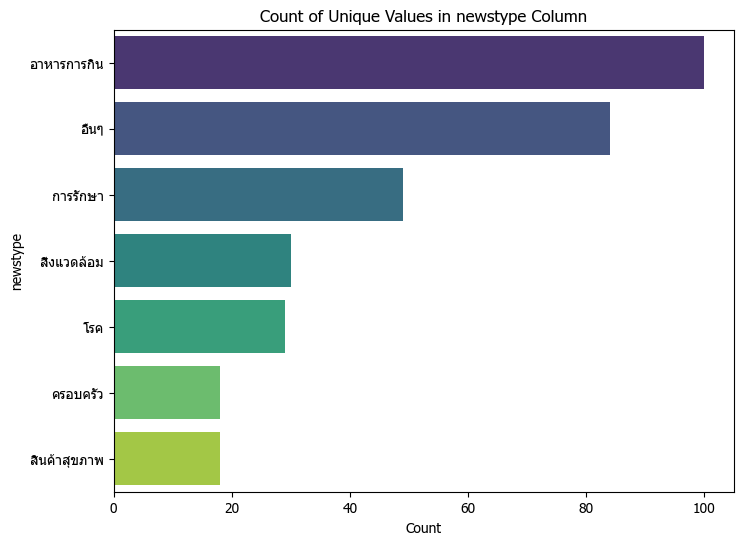

In [25]:
# Count unique values in the 'newstype' column
value_counts = df_test['newstype'].value_counts()

# Plot the horizontal bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
plt.title('Count of Unique Values in newstype Column')
plt.xlabel('Count')
plt.ylabel('newstype')

# Show the plot
plt.show()

In [26]:
df_test['target'] = label_encoder.fit_transform(df_test['newstype'])

In [27]:
df_test

,title,details,newstype,year,month,day,publish_date,season,oranginal_title,target
0,หนุ่ม ชัยภูมิ สวนกระแส ก๊ง เหล้า ผ่า อากาศ หนา...,ดื่ม เครื่องดื่ม แอลกอฮอล์ ร่างกาย อบอุ่น คลาย...,อื่นๆ,2023,1,27,2023-01-27,winter,“หนุ่มชัยภูมิ” สวนกระแส ก๊งเหล้าผ่าอากาศหนาว เ...,5
1,เตือนภัย เด็ก ขวบ สูบบุหรี่ ไฟฟ้า สุดท้าย ปอด ...,เป็นข่าว เกิดขึ้น ต่างประเทศ คุณหมอ ท่าน นึง ...,อื่นๆ,2023,1,7,2023-01-07,winter,เตือนภัย เด็ก 10 กว่าขวบ สูบบุหรี่ไฟฟ้า สุดท้า...,5
2,หมอ เผย เคส คนไข้ จมูก สร้าง กลิ่น หลอน หาว ง่...,โรค ไมเกรน ทางการแพทย์ แน่ชัด สาเหตุ ปัจจัยหลั...,โรค,2023,11,3,2023-11-03,winter,หมอเผยเคส คนไข้จมูกสร้างกลิ่นหลอน หาวแต่ไม่ง่ว...,6
3,ระวัง อันตราย หนอง ขึ้นสมอง ฟันผุ,ฟันบน ผุ ทำให้เกิด ติดเชื้อ เจ้า โพรง อากาศ จม...,โรค,2023,9,11,2023-09-11,rainny,ระวังอันตรายหนองขึ้นสมอง จากฟันผุ,6
4,หาย Covid กิน ดี ฟื้นฟู ร่างกาย ป้องกัน LongCovid,กรมอนามัย เผย แพร่ข่าว เรื่อง กรมอนามัย กระทรว...,โรค,2023,3,24,2023-03-24,summer,หาย Covid กินอะไรดีช่วยฟื้นฟูร่างกาย ป้องกัน L...,6
...,...,...,...,...,...,...,...,...,...,...
323,ข่าว ปลอม อย่า แชร์ ผลิตภัณฑ์ VitaGold ต่อต้าน...,กรณี โฆษณาชวนเชื่อ ประเด็น เรื่อง ผลิตภัณฑ์ Vi...,สินค้าสุขภาพ,2023,8,5,2023-08-05,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Vita Gold ต่อต้าน...,2
324,ข่าว ปลอม อย่า แชร์ ผลิตภัณฑ์ Eranol อาหารเสริ...,โฆษณา ผลิตภัณฑ์ Eranol อาหารเสริม ฟื้นฟู เส้น ...,สินค้าสุขภาพ,2023,6,8,2023-06-08,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Eranol อาหารเสริม...,2
325,ข่าว ปลอม อย่า แชร์ ผลิตภัณฑ์ RichSkin กำจัด ร...,โฆษณา สวย ความงาม เรื่อง ผลิตภัณฑ์ RichSkin กำ...,สินค้าสุขภาพ,2023,6,8,2023-06-08,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์ Rich Skin สามารถก...,2
326,ข่าว ปลอม อย่า แชร์ ผลิตภัณฑ์ แผ่น แปะ เท้า คว...,คำแนะนำ ชวนเชื่อ เรื่อง ผลิตภัณฑ์ แผ่น แปะ เท้...,สินค้าสุขภาพ,2023,6,8,2023-06-08,rainny,ข่าวปลอม อย่าแชร์! ผลิตภัณฑ์แผ่นแปะเท้า ช่วยเพ...,2


Accuracy on Train: 0.9373870172555464
Accuracy on Test: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.60      0.24      0.35        49
    ครอบครัว       0.40      0.67      0.50        18
สินค้าสุขภาพ       0.59      0.72      0.65        18
 สิ่งแวดล้อม       0.75      0.70      0.72        30
 อาหารการกิน       0.70      0.89      0.78       100
       อื่นๆ       0.57      0.45      0.50        84
         โรค       0.44      0.52      0.48        29

    accuracy                           0.61       328
   macro avg       0.58      0.60      0.57       328
weighted avg       0.61      0.61      0.59       328



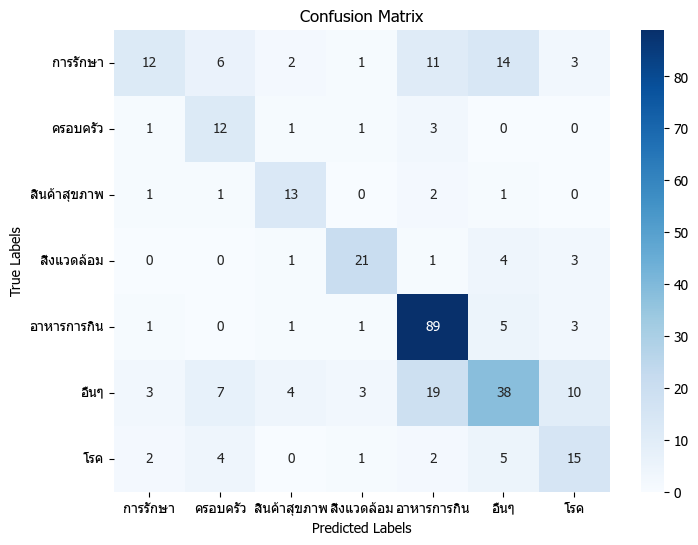

News Type: อื่นๆ
Misclassified Titles:
  - Title: เครื่องทำน้ำอุ่นระบบแก๊ส เสี่ยงอันตรายจากแก๊สรั่ว, Correct Class: อื่นๆ, Predicted Class: สินค้าสุขภาพ
  - Title: หน้ากากอนามัย ไม่สามารถป้องกันควันไฟป่าได้ ไม่จับอนุภาคขนาดเล็กที่พบในควัน ที่อาจเป็นอันตรายต่อสุขภาพ, Correct Class: อื่นๆ, Predicted Class: สิ่งแวดล้อม
  - Title: กรณีร้องเรียนแคมป์คนงานสร้างปัญหาเดือดร้อนรำคาญ ไม่มีระบบสาธารณสุข และปล่อยน้ำเสียลงทิ้งบ่อน้ำธรรมชาติจนใช้อุปโภคบริโภคไม่ได้, Correct Class: อื่นๆ, Predicted Class: สิ่งแวดล้อม
  - Title: กรมอนามัย ร่วมกับ GISTDA เปิดตัวแอปฯ Life Dee ช่วยแจ้งเตือนค่าฝุ่น, Correct Class: อื่นๆ, Predicted Class: โรค
  - Title: 5 ท่าบริหารสมอง ป้องกันสมองเสื่อมก่อนวัย, Correct Class: อื่นๆ, Predicted Class: ครอบครัว
  - Title: อายุ 30+ จัดฟันช้าไปไหม, Correct Class: อื่นๆ, Predicted Class: ครอบครัว
  - Title: โรคติดน้ำแข็ง เกิดจากร่างกายขาดธาตุเหล็ก, Correct Class: อื่นๆ, Predicted Class: โรค
  - Title: การหัวเราะ ช่วยลดน้ำหนักได้, Correct Class: อื่นๆ, Predicted Class: อาหารการกิน

In [28]:
def CountVectorizer_LogisticRegression_test_error_check (df_train,df_test):


  X = df_train['title'] + ' ' + df_train['details']+ ' ' + df_train['month'].astype(str)+ ' '+ df_train['season']
  y = df_train['target']

  x_test = df_test['title'] + ' ' + df_test['details']+ ' ' + df_test['month'].astype(str)+ ' '+ df_test['season']
  y_test = df_test['target']

  model_vectorizer = CountVectorizer(ngram_range=(1, 2),lowercase=False)



  X = model_vectorizer.fit_transform(X)
  x_test = model_vectorizer.transform(x_test)



  model = LogisticRegression(class_weight='balanced',C=0.1,max_iter=100,solver='liblinear') #F1 0.62

  model.fit(X, y)
  # Use cross-validation to assess model performance
  # cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  # print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  y_pred = model.predict(x_test)
  y_train_pred = model.predict(X)
  # Calculate accuracy
  accuracy = accuracy_score(y, y_train_pred)
  print("Accuracy on Train:", accuracy)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy on Test:", accuracy)
  # Generate a classification report
  y_test = label_encoder.inverse_transform(y_test)
  y_pred = label_encoder.inverse_transform(y_pred)
  report = classification_report(y_test, y_pred)
  print("Classification Report:")
  print(report)

  # Create a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

  df_test['predicted_target'] = model.predict(x_test)
  df_test['predicted_target'] = label_encoder.inverse_transform(df_test['predicted_target'])
  # Filter misclassified instances
  misclassified_df = df_test[df_test['newstype'] != df_test['predicted_target']]
    # Print misclassified titles for each news type
  for news_type in df_test['newstype'].unique():
    misclassified_titles = misclassified_df[misclassified_df['newstype'] == news_type]['oranginal_title'].tolist()
    correct_class = news_type
    predicted_class = misclassified_df[misclassified_df['newstype'] == news_type]['predicted_target'].tolist()
    print(f"News Type: {news_type}")
    print("Misclassified Titles:")
    for i, title in enumerate(misclassified_titles):
        print(f"  - Title: {title}, Correct Class: {correct_class}, Predicted Class: {predicted_class[i]}")
    print("\n")

  all_pred_proba = model.predict_proba(x_test)
  for i, target_class in enumerate(model.classes_):
    target_class = label_encoder.inverse_transform([target_class])[0]
    df_test[f'predicted_{target_class}'] = all_pred_proba[:, i]

CountVectorizer_LogisticRegression_test_error_check(df,df_test)

In [29]:
# Define a formatting function
def format_to_0_00(x):
    if isinstance(x, (int, float)):
        return '{:.2f}'.format(x)
    else:
        return x

df_table = df_test[['oranginal_title', 'predicted_การรักษา', 'predicted_ครอบครัว', 'predicted_สินค้าสุขภาพ', 'predicted_สิ่งแวดล้อม', 'predicted_อาหารการกิน', 'predicted_อื่นๆ', 'predicted_โรค']].iloc[:100]
df_table = df_table.applymap(format_to_0_00)
# Add columns to the table
print(tabulate(df_table, headers='keys', tablefmt='pretty'))

+----+--------------------------------------------------------------------------------------------------+-------------------+-------------------+---------------------+--------------------+----------------------+---------------+---------------+
|    |                                         oranginal_title                                          | predicted_การรักษา | predicted_ครอบครัว | predicted_สินค้าสุขภาพ | predicted_สิ่งแวดล้อม | predicted_อาหารการกิน | predicted_อื่นๆ | predicted_โรค |
+----+--------------------------------------------------------------------------------------------------+-------------------+-------------------+---------------------+--------------------+----------------------+---------------+---------------+
| 0  |                    “หนุ่มชัยภูมิ” สวนกระแส ก๊งเหล้าผ่าอากาศหนาว เช้ามาตัวแข็ง ไร้ลมหายใจ                     |       0.00        |       0.00        |        0.07         |        0.00        |         0.42         |     0.51      |     0.00      |
|

C:\Users\Chonn\AppData\Local\Temp\ipykernel_27972\1222686818.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_table = df_table.applymap(format_to_0_00)


Accuracy on Train: 0.9373870172555464
Accuracy on Test: 0.5952380952380952
Classification Report:
              precision    recall  f1-score   support

    การรักษา       0.43      0.17      0.24        18
    ครอบครัว       0.63      0.67      0.65        18
สินค้าสุขภาพ       0.68      0.72      0.70        18
 สิ่งแวดล้อม       0.86      0.67      0.75        18
 อาหารการกิน       0.52      0.89      0.65        18
       อื่นๆ       0.42      0.44      0.43        18
         โรค       0.65      0.61      0.63        18

    accuracy                           0.60       126
   macro avg       0.60      0.60      0.58       126
weighted avg       0.60      0.60      0.58       126



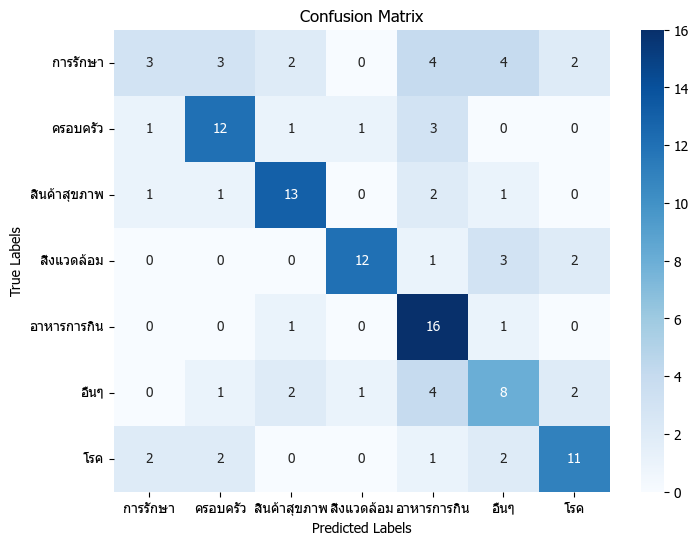

In [30]:
def CountVectorizer_LogisticRegression_test_under (df_train,df_test):


  X = df_train['title'] + ' ' + df_train['details']+ ' ' + df_train['month'].astype(str)+ ' '+ df_train['season']
  y = df_train['target']

  x_test = df_test['title'] + ' ' + df_test['details']+ ' ' + df_test['month'].astype(str)+ ' '+ df_test['season']
  y_test = df_test['target']

  model_vectorizer = CountVectorizer(ngram_range=(1, 2),lowercase=False)



  X = model_vectorizer.fit_transform(X)
  x_test = model_vectorizer.transform(x_test)

  # Undersample the test data
  sampler = RandomUnderSampler(random_state=42)
  x_test, y_test = sampler.fit_resample(x_test, y_test)


  model = LogisticRegression(class_weight='balanced',C=0.1,max_iter=100,solver='liblinear') #F1 0.62

  model.fit(X, y)
  # Use cross-validation to assess model performance
  # cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
  # print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

  y_pred = model.predict(x_test)
  y_train_pred = model.predict(X)
  # Calculate accuracy
  accuracy = accuracy_score(y, y_train_pred)
  print("Accuracy on Train:", accuracy)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy on Test:", accuracy)
  # Generate a classification report
  y_test = label_encoder.inverse_transform(y_test)
  y_pred = label_encoder.inverse_transform(y_pred)
  report = classification_report(y_test, y_pred)
  print("Classification Report:")
  print(report)

  # Create a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

CountVectorizer_LogisticRegression_test_under(df,df_test)

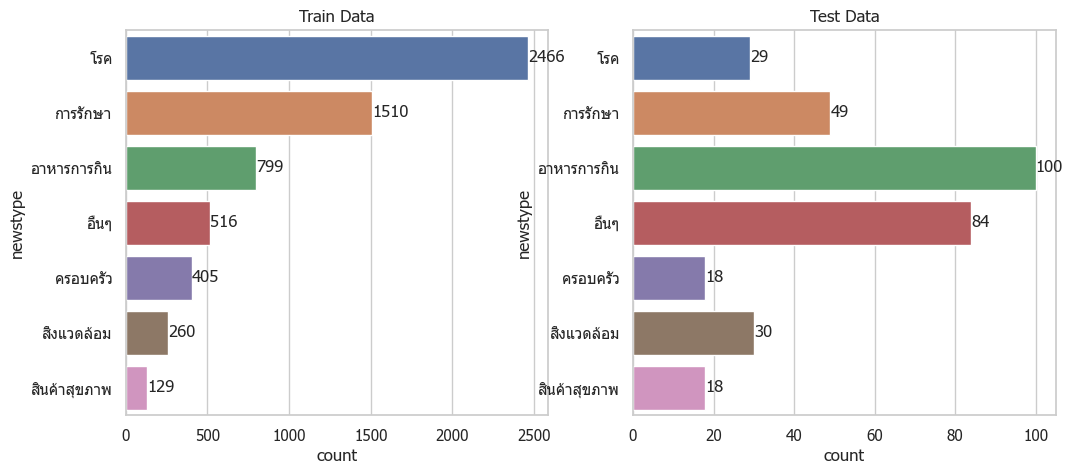

In [40]:
plt.rcParams['font.family'] = 'tahoma'
order = df['newstype'].value_counts(ascending=False).index

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
ax = sns.countplot(data=df, y='newstype', order=order)
ax.bar_label(ax.containers[0])
ax.set_title('Train Data')

plt.subplot(1,2,2)
ax = sns.countplot(data=df_test, y='newstype', order=order)
ax.bar_label(ax.containers[0])
ax.set_title('Test Data');
